# Iris Species Classification

## The notebook contains detailed analysis of data on iris species for performing classification so as to determine the correct species of a sample iris flower.   

Before diving to mathematical crunching of the data provided for modeling, let us get clear of some basic terminologies about the data provided. The data provided contains 6 columns with 150 rows in it. Following are the columns with some basic terminologies:

<b>Id</b>: The primary key uniquely representing the iris flowers.

<b>SepalLengthCm</b>: The length of the sepal of the iris flower in centimetres.

<b>SepalWidthCm</b>: The width of the sepal of the iris flower in centimetres.

    A Sepal: Each of the parts of the calyx of a flower, enclosing the petals and typically green and leaf-like.

<b>PetalLengthCm</b>: The length of the petal of the iris flower in centimetres.

    A Petal: Each of the segments of the corolla of a flower, which are modified leaves and are typically coloured.

<b>PetalWidthCm</b>: The width of the petal of the iris flower in centimetres.

<b>Species</b>: The species of the iris flower.



The distinction between a sepal and a petal of a flower can be easily understood as shown in the image below:

<img src="petal-sepal.jpg", width=300, height = 300/>

Let's start the analytics process by importing the dataset and having a quick statistical description.

In [1]:
#Importing the necessary libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('Iris Data.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


As one can notice, the dimensions of the sepal and petal of a flower are well in range 0 to 10, so there is no need of scaling them. Also, one can conspicuously agree with the fact that the "Id" of an iris flower does not make any contribution in deciding the species of the flower. Therefore we don't include the Id column in our further analysis. Let's get rid of it:

In [4]:
dataset_new = dataset[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]
dataset_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


While statistical measures are great for gaining the insights of the data, learning from its distribution via visualization is better.

Let us visualize the distribution of data based on various attributes:

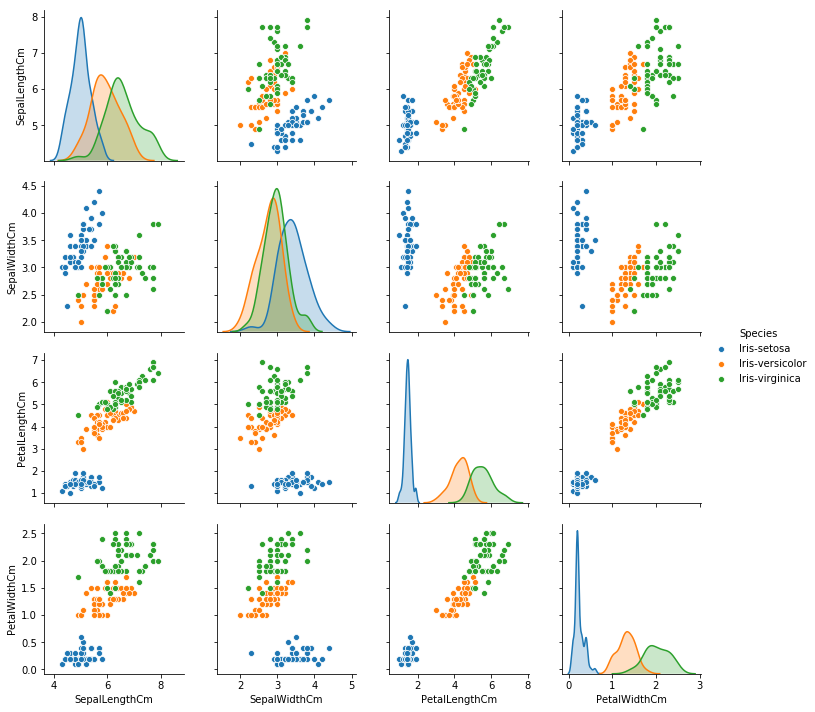

In [5]:
sns.pairplot(dataset_new,hue="Species")

The above pairplot is informative enough to check the distribution of data based on their classes. We can notice that the species "Iris-setosa" is quite differentely distributed in its attributes whereas the remaining species follow a somewhat similar course.

Following code plots the Species wise distribution of their Sepal dimensions:

<pre>
The red plot corresponds to Iris-setosa
The orange plot corresponds to Iris-versicolor
The green plot corresponds to Iris-virginica
</pre>

Text(0.5,1,'Species wise estimation plots of their Sepal dimensions:')

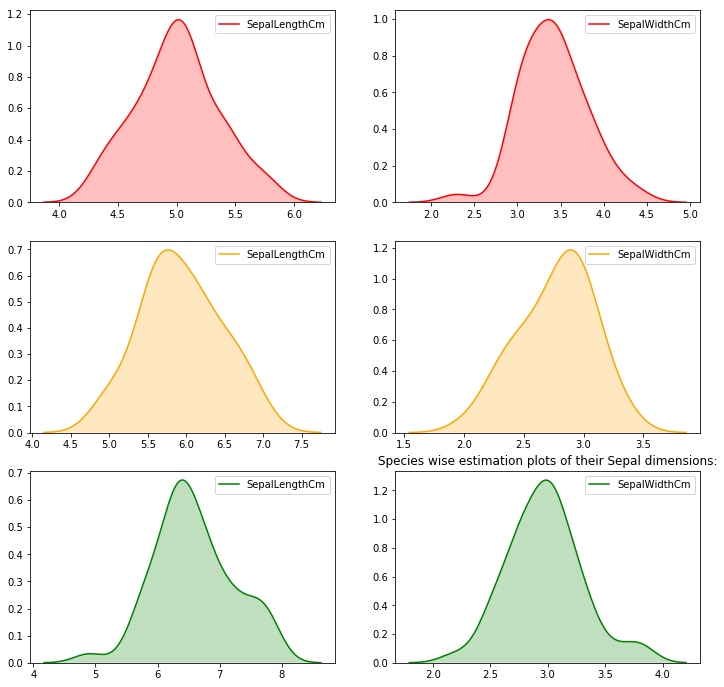

In [6]:
data_0 = DataFrame()
data_1 = DataFrame()
data_2 = DataFrame()

for species,info in dataset_new.groupby("Species"):
    if(species=="Iris-setosa"):
        data_0[["SepalLengthCm","SepalWidthCm","PetalWidthCm","PetalLengthCm"]] = info[["SepalLengthCm","SepalWidthCm","PetalWidthCm","PetalLengthCm"]]
    if(species=="Iris-versicolor"):
        data_1[["SepalLengthCm","SepalWidthCm","PetalWidthCm","PetalLengthCm"]] = info[["SepalLengthCm","SepalWidthCm","PetalWidthCm","PetalLengthCm"]]
    if(species=="Iris-virginica"):
        data_2[["SepalLengthCm","SepalWidthCm","PetalWidthCm","PetalLengthCm"]] = info[["SepalLengthCm","SepalWidthCm","PetalWidthCm","PetalLengthCm"]]

        
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.kdeplot(data_0["SepalLengthCm"],color="red",shade="True")
plt.subplot(3,2,3)
sns.kdeplot(data_1["SepalLengthCm"],color="orange",shade="True")
plt.subplot(3,2,5)
sns.kdeplot(data_2["SepalLengthCm"],color="green",shade="True")

plt.subplot(3,2,2)
sns.kdeplot(data_0["SepalWidthCm"],color="red",shade="True")
plt.subplot(3,2,4)
sns.kdeplot(data_1["SepalWidthCm"],color="orange",shade="True")
plt.subplot(3,2,6)
sns.kdeplot(data_2["SepalWidthCm"],color="green",shade="True")
plt.title("Species wise estimation plots of their Sepal dimensions:")

Following code plots the Species wise distribution of their Petal dimensions:

<pre>
The red plot corresponds to Iris-setosa
The orange plot corresponds to Iris-versicolor
The green plot corresponds to Iris-virginica
</pre>

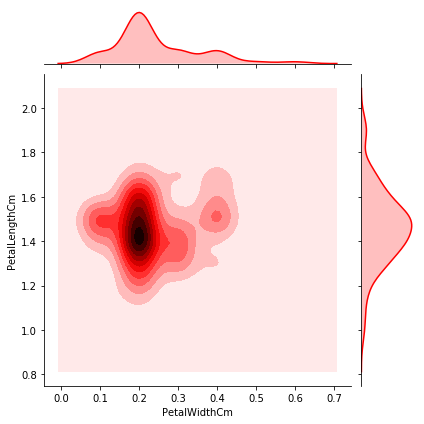

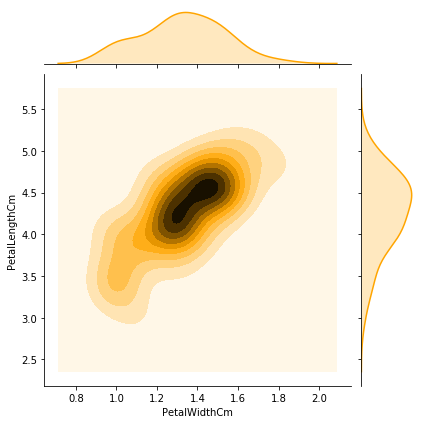

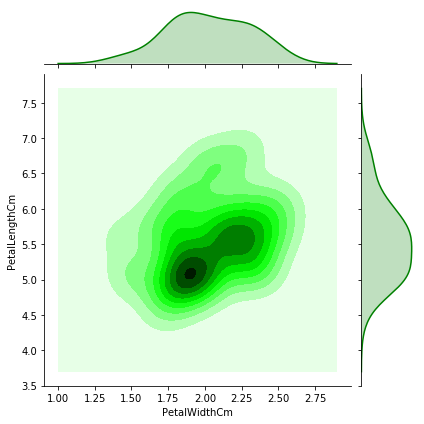

In [7]:
sns.jointplot(data_0["PetalWidthCm"],data_0["PetalLengthCm"],color="red",kind="kde",shade="True")
sns.jointplot(data_1["PetalWidthCm"],data_1["PetalLengthCm"],color="orange",kind="kde",shade="True")
sns.jointplot(data_2["PetalWidthCm"],data_2["PetalLengthCm"],color="green",kind="kde",shade="True")

It is a good practice to not modify the original instance of data and instead, create a new copy of it with modifications needed. Now the data looks neat and persuasive enough for us to quickly apply a Machine Learning model and predict results. But before we do that, we need to take care of the values in species column. Since Machine learning models deal with mathematical equations and the values to be predicted in this project are not mathematical entities, we need to encode the values and give them numerical representation. 


We will use the LabelEncoder class from the sci-kit learn preprocessing library. Since we are about to preprocess the data, we need to convert the DataFrame of dataset into an array format. We will also separate the dataset columns into the dependent variables and the independent variables. 

The dependent variable is the value which we are predicting and the independent variables are the values which contribute to predict the value. Following is the code for all the changes:

In [8]:
#Converting the dataset into arrays and separating the dependent and independent variables:
x = dataset_new.iloc[:,[0,1,2,3]].values
y = dataset_new.iloc[:, 4].values

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

As you can see, the species are encoded into numerical values 0,1 and 2. The values are encoded in the alphabetical order and hence the species "Iris-setosa", "Iris-versicolor" and "Iris-virginica" are represented as 0, 1 and 2 respectively.

Let's now quickly move to modeling, but before that, we must divide the dataset into the training and test sets. We will train the data on train set and test its performance on the other.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

The above code creates four subparts of the dataset. The test_size parameter determines the size of the test set. It is a usual practice to choose the size of the test set between 20-35%. The size of the training set is larger than the test set because it is the training set on which the model will be trained and more the data, better is the model.

In [10]:
x_train

array([[ 6.4,  3.1,  5.5,  1.8],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 6.4,  2.8,  5.6,  2.2],
       [ 5.2,  2.7,  3.9,  1.4],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 5.9,  3. ,  4.2,  1.5],
       [ 5.8,  2.6,  4. ,  1.2],
       [ 6.8,  3. ,  5.5,  2.1],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 6.9,  3.1,  5.1,  2.3],
       [ 5. ,  3.5,  1.6,  0.6],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 6.7,  3.3,  5.7,  2.5],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 5.6,  2.5,  3.9,  1.1],
       [ 7.7,  3. ,  6.1,  2.3],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 5.5,  2.4,  3.8,  1.1],
       [ 6.3,  2.7,  4.9,  1.8],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 6.3,  2.5,  5. ,  1.9],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 6

In [11]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 2, 0], dtype=int64)

In [12]:
x_test

array([[ 5.8,  2.8,  5.1,  2.4],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 5.5,  4.2,  1.4,  0.2],
       [ 7.3,  2.9,  6.3,  1.8],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 6.3,  3.3,  6. ,  2.5],
       [ 5. ,  3.5,  1.3,  0.3],
       [ 6.7,  3.1,  4.7,  1.5],
       [ 6.8,  2.8,  4.8,  1.4],
       [ 6.1,  2.8,  4. ,  1.3],
       [ 6.1,  2.6,  5.6,  1.4],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 6.1,  2.8,  4.7,  1.2],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 5.5,  2.6,  4.4,  1.2],
       [ 4.8,  3. ,  1.4,  0.3],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 6.2,  2.8,  4.8,  1.8],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.8,  1.9,  0.4],
       [ 6.2,  2.9,  4.3,  1.3],
       [ 5. ,  2.3,  3.3,  1. ],
       [ 5. ,  3.4,  1.6,  0.4]])

In [13]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0], dtype=int64)

Now that we have the training and the test set ready, let us quickly start modeling. For classification, we will apply some classification algorithms provided by the sci-kit library. We will try all the classification algorithms one by one and choose the most accurate one.

In [14]:
#Modeling with K-nearest neighbor classification algorithm
#The number of neighbors chosen for a node is 5 and the distance measure chosen is Minkowski distance.
#You can also experiment with Euclidian distance or Manhattan distance and see what difference it brings. 

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)

#Predicting the results
y_pred_knn = classifier_knn.predict(x_test)

In [15]:
#Let us check the accuracy of the KNN classifier that we just created.
classifier_knn.score(x_test,y_test)

0.96666666666666667

As we can notice, the accuracy of the classification is 96.66%. Well, the accuracy of the classifier is great, but it is hazardous to judge the model's efficiency only on its accuracy. 

Let us check out another evaluation metric known as Confusion matrix.

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model or classifier,on a set of test data for which the true values are known.
For more, refer:  https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

Let us create a confusion matrix for our own classifier.

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)

DataFrame(cm)

,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


We can read the above confusion matrix as follows:

Confusion Matrix:

<pre>
Predicted   0   1  2  __all__
Actual                       
0          11   0  0       11
1           0  12  1       13
2           0   0  6       06
__all__    11  12  7       30
</pre>

Let us try various other algorithms and test them for their performance

In [17]:
#Modeling with a Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(x_train, y_train)

#Predicting the results
y_pred_dt = classifier_dt.predict(x_test)

#Let us check the accuracy of the Decision Tree classifier that we just created.
classifier_dt.score(x_test,y_test)

1.0

We get another great accuracy with the Decision Tree classifier.

In [18]:
#Modeling with a Support Vector Machine classification algorithm
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(x_train, y_train)

#Predicting the results
y_pred_svc = classifier_svc.predict(x_test)

#Let us check the accuracy of the Support Vector classifier that we just created.
classifier_svc.score(x_test,y_test)

1.0

The accuracy from SVC is also great, ie. 100%.

Now that we have two models with equivalent accuracies, we can choose an appropriate model considering further criteria such as performance and scalability. 

Hence, we successfully conclude the Iris Species Classification.

### Thanks for reading the work. Any additional improvements, feedback, corrections and suggestions are welcome.